In [4]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [5]:
df = pd.read_excel("/content/EastWestAirlines.xlsx",1)
df.head()

ID#  Balance  Qual_miles  ...  Flight_trans_12  Days_since_enroll  Award?
0    1    28143           0  ...                0               7000       0
1    2    19244           0  ...                0               6968       0
2    3    41354           0  ...                0               7034       0
3    4    14776           0  ...                0               6952       0
4    5    97752           0  ...                4               6935       1

[5 rows x 12 columns]

In [6]:
df.shape

(3999, 12)

In [7]:
df.describe()

ID#       Balance  ...  Days_since_enroll       Award?
count  3999.000000  3.999000e+03  ...         3999.00000  3999.000000
mean   2014.819455  7.360133e+04  ...         4118.55939     0.370343
std    1160.764358  1.007757e+05  ...         2065.13454     0.482957
min       1.000000  0.000000e+00  ...            2.00000     0.000000
25%    1010.500000  1.852750e+04  ...         2330.00000     0.000000
50%    2016.000000  4.309700e+04  ...         4096.00000     0.000000
75%    3020.500000  9.240400e+04  ...         5790.50000     1.000000
max    4021.000000  1.704838e+06  ...         8296.00000     1.000000

[8 rows x 12 columns]

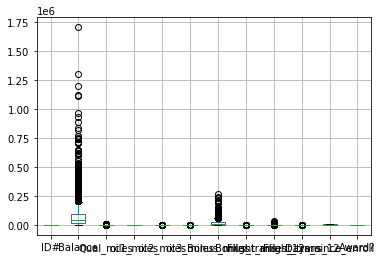

In [8]:
df.boxplot()

In [9]:
#removing 1st and last column
data=df.iloc[:,1:-1]


In [10]:
#standardizing data before processing
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
data_norm=scalar.fit_transform(data)

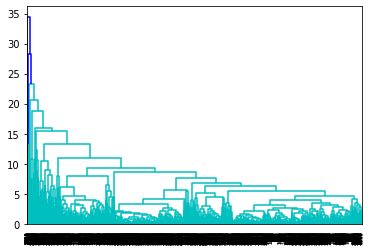

In [11]:
#Dendogram
dendo=sch.dendrogram(sch.linkage(data_norm,method="complete"))

<Figure size 1440x432 with 0 Axes>

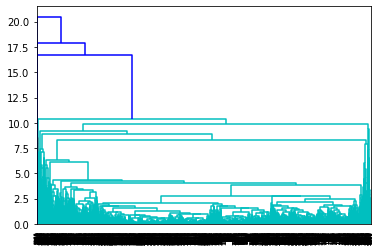

<Figure size 1440x432 with 0 Axes>

In [12]:
dendo=sch.dendrogram(sch.linkage(data_norm,method="average")) 
plt.figure(figsize =(20, 6))


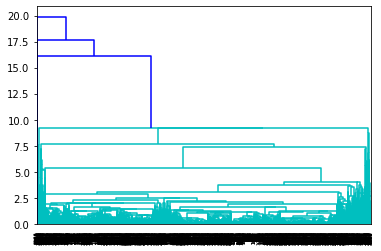

In [13]:
dendo=sch.dendrogram(sch.linkage(data_norm,method="centroid"))

In [14]:
#clustring using n=4
hc=AgglomerativeClustering(n_clusters=5,linkage="average")
y_pred=hc.fit_predict(data_norm)

In [15]:
df["cluster_hirachy"]=y_pred

Text(0, 0.5, 'ID Counts')

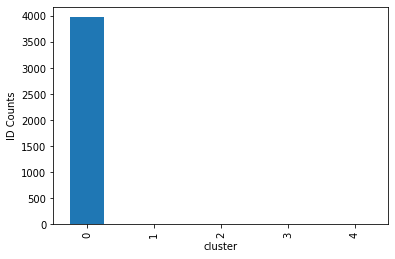

In [16]:
df.groupby(['cluster']).count()['ID#'].plot(kind='bar')    # As we can see most of our data belongs to 1st cluster hence this method is not good for clustring 
plt.ylabel('ID Counts')

# **K_MEANS**

In [17]:
from sklearn.cluster import KMeans

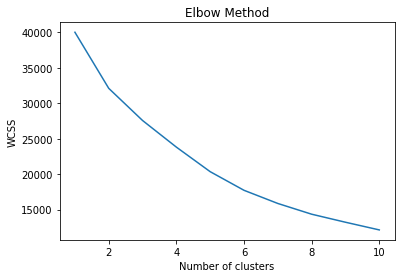

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
#using best k values for cluster
clusters_new = KMeans(2, random_state=42)
clusters_new.fit(data_norm)

KMeans(n_clusters=4, random_state=42)

In [22]:
clusters_new.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [24]:
df["cluster_k_means"]=clusters_new.labels_

# **DBSCAN**

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
dbscan = DBSCAN(eps=
                2, min_samples=7)
dbscan.fit(data_norm)

DBSCAN(eps=2, min_samples=7)

In [40]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
df["cluster_DBSCAN"]=dbscan.labels_

In [39]:
df

ID#  Balance  Qual_miles  ...  cluster  cluster_k_means=  cluster_DBSCAN
0        1    28143           0  ...        0                 0               0
1        2    19244           0  ...        0                 0               0
2        3    41354           0  ...        0                 0               0
3        4    14776           0  ...        0                 0               0
4        5    97752           0  ...        0                 2               0
...    ...      ...         ...  ...      ...               ...             ...
3994  4017    18476           0  ...        0                 0               0
3995  4018    64385           0  ...        0                 0               0
3996  4019    73597           0  ...        0                 0               0
3997  4020    54899           0  ...        0                 0               0
3998  4021     3016           0  ...        0                 0               0

[3999 rows x 15 columns]